In [49]:
# 📌 Section 1: Project Title and Intro

"""
# Predicting Expected Goals (xG) from Match Stats using Machine Learning

Author: [Faizan J]

Expected Goals (xG) is a popular metric in football analytics that estimates the probability of a shot resulting in a goal.
Instead of using a black-box xG value, this project builds a machine learning model to predict xG using basic match stats such as shots, touches, and minutes played.
"""

# 📌 Section 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 📌 Section 3: Load and Preprocess Data
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/database.csv')

# Drop columns that aren't useful
df = df.drop(columns=['Player','Position'])

x=df.drop(columns=['Expected Goals (xG)','Goals'])  # inputs
y=df['Expected Goals (xG)'] # target to predict

# 📌 Section 4: Split Data and Train Model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model= GradientBoostingRegressor(random_state=42)
model.fit(x_train,y_train)

# 📌 Section 5: Evaluate Model
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("R-squared:",r2)


# 📌 Section 6: Predict xG for a Real Match

# Example input for a single player’s match performance the actual goal in this match was 1
# inputs are [minutes played, assists, shoots, touches , carries]

jude=np.array([[90, 0, 3, 78, 0]])
predicted_xg=model.predict(jude)
print("The xG for this player is :",predicted_xg[0])





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 0.020438427859334
R-squared: 0.4069283592453615
The xG for this player is : 0.524444989878263


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


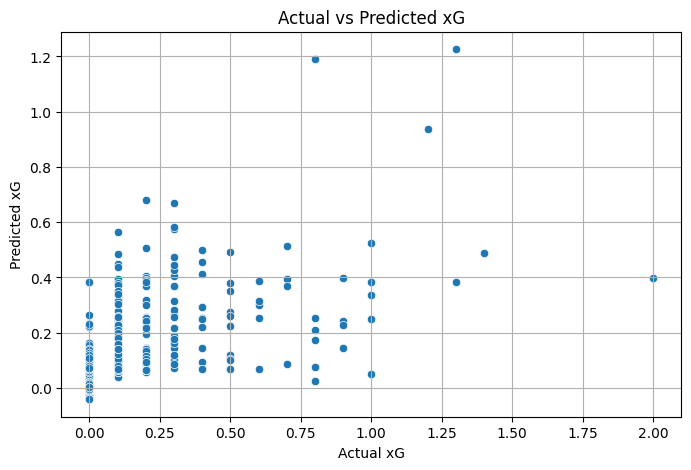

In [48]:
# 📌 Section 7: Visualize Predictions vs Actual

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual xG")
plt.ylabel("Predicted xG")
plt.title("Actual vs Predicted xG")
plt.grid(True)
plt.show()